In [187]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [188]:
data = pd.read_csv('dataset.csv')

In [189]:
data.head(5)

,id,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,city,zoning,subdivision,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,grade,fbsmt_grade,condition,stories,beds,bath_full,bath_3qtr,bath_half,garb_sqft,gara_sqft,wfnt,golf,greenbelt,noise_traffic,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,0,2014-11-15,236000,2.0,,nochg,2025,47.2917,-122.3658,53,FEDERAL WAY,RS7.2,ALDERWOOD SOUTH DIV NO. 02,2,167000,372000,1975,0,10919,1560,1560,0,7,0,5,1.0,3,1,1,0,0,500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,I
1,1,1999-01-15,313300,NaN,26,nochg,2025,47.6531,-122.1996,74,KIRKLAND,RS 8.5,WILDWOOD LANE NO. 03,2,1184000,598000,1962,0,8900,2040,1220,820,7,7,4,1.0,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Q
2,2,2006-08-15,341000,1.0,,nochg,2025,47.4733,-122.1901,30,RENTON,R-8,FALCON RIDGE (CEDAR RIDGE),2,230000,356000,1986,0,4953,1640,820,0,7,0,3,2.0,3,2,0,1,0,480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,K
3,3,1999-12-15,267000,1.0,,nochg,2025,47.4739,-122.3295,96,BURIEN,RS-7200,OLYMPIC VUE ESTATES,2,190000,518000,1998,0,6799,2610,1010,500,8,7,3,2.0,4,2,0,1,0,530,0,0,0,1,0,0,0,0,0,0,0,0,0,0,G
4,4,2018-07-15,1650000,2.0,,miss99,2025,47.7516,-122.1222,36,KING COUNTY,RA2.5,HOLLYWOOD HILL HIGHLANDS,2,616000,1917000,1998,0,31687,4040,3640,0,12,0,3,2.0,4,2,1,1,0,810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,P


In [190]:
missing = data.isna().sum().sort_values(ascending=False)
missing_percent = (missing * 100 / data.shape[0]).round(2)
print(missing_percent.to_string())

sale_nbr            21.09
subdivision          8.78
submarket            0.86
sale_price           0.00
sale_warning         0.00
join_status          0.00
sale_date            0.00
join_year            0.00
latitude             0.00
area                 0.00
longitude            0.00
city                 0.00
zoning               0.00
present_use          0.00
id                   0.00
land_val             0.00
imp_val              0.00
year_reno            0.00
year_built           0.00
sqft                 0.00
sqft_1               0.00
sqft_fbsmt           0.00
sqft_lot             0.00
fbsmt_grade          0.00
condition            0.00
stories              0.00
beds                 0.00
bath_full            0.00
bath_3qtr            0.00
bath_half            0.00
grade                0.00
garb_sqft            0.00
gara_sqft            0.00
golf                 0.00
wfnt                 0.00
noise_traffic        0.00
view_rainier         0.00
view_olympics        0.00
greenbelt   

In [191]:
data[['city', 'zoning', 'area']].value_counts()

city              zoning             area
SAMMAMISH         R4                 35      3205
MAPLE VALLEY      R-6                56      3081
FEDERAL WAY       RS7.2              53      2881
SNOQUALMIE        MU                 75      2362
SAMMAMISH         R6                 69      2214
REDMOND           NR                 72      2009
SAMMAMISH         R4                 69      1890
SEATTLE           NR3                11      1879
KENT              SR-6               62      1850
BURIEN            RS-7200            96      1743
RENTON            R-8                85      1711
KENT              SR-6               29      1699
BELLEVUE          R-5                67      1660
AUBURN            R7                 28      1649
SEATTLE           NR3                43      1621
                                     45      1616
ISSAQUAH          UVSF-1             75      1615
COVINGTON         R6                 86      1571
DES MOINES        RS-7200            88      1571
SEATTLE 

In [192]:
data.dtypes

id                    int64
sale_date            object
sale_price            int64
sale_nbr            float64
sale_warning         object
join_status          object
join_year             int64
latitude            float64
longitude           float64
area                  int64
city                 object
zoning               object
subdivision          object
present_use           int64
land_val              int64
imp_val               int64
year_built            int64
year_reno             int64
sqft_lot              int64
sqft                  int64
sqft_1                int64
sqft_fbsmt            int64
grade                 int64
fbsmt_grade           int64
condition             int64
stories             float64
beds                  int64
bath_full             int64
bath_3qtr             int64
bath_half             int64
garb_sqft             int64
gara_sqft             int64
wfnt                  int64
golf                  int64
greenbelt             int64
noise_traffic       

# hundling missing values


In [193]:
data["sale_nbr"] = data["sale_nbr"].fillna(0)


In [194]:
data["subdivision"] = (
    data["subdivision"]
    .astype(str)
    .str.lower()
    .str.strip()
)

data["subdivision"] = data["subdivision"].replace(
    ["nan", "none", "n/a", "-", "?"], "unknown"
)

data["subdivision"] = data["subdivision"].fillna("unknown")


In [195]:
data["submarket"] = (
    data["submarket"]
    .astype(str)
    .str.lower()
    .str.strip()
)

data["submarket"] = data["submarket"].fillna("unknown")


In [196]:
missing = data.isna().sum().sort_values(ascending=False)
missing_percent = (missing * 100 / data.shape[0]).round(2)
print(missing_percent.to_string())

id                  0.0
sale_date           0.0
sale_price          0.0
sale_nbr            0.0
sale_warning        0.0
join_status         0.0
join_year           0.0
latitude            0.0
longitude           0.0
area                0.0
city                0.0
zoning              0.0
subdivision         0.0
present_use         0.0
land_val            0.0
imp_val             0.0
year_built          0.0
year_reno           0.0
sqft_lot            0.0
sqft                0.0
sqft_1              0.0
sqft_fbsmt          0.0
grade               0.0
fbsmt_grade         0.0
condition           0.0
stories             0.0
beds                0.0
bath_full           0.0
bath_3qtr           0.0
bath_half           0.0
garb_sqft           0.0
gara_sqft           0.0
wfnt                0.0
golf                0.0
greenbelt           0.0
noise_traffic       0.0
view_rainier        0.0
view_olympics       0.0
view_cascades       0.0
view_territorial    0.0
view_skyline        0.0
view_sound      

In [197]:
# Convert to datetime first
data["sale_date"] = pd.to_datetime(data["sale_date"], errors="coerce")

# Create 3 new columns from sale_date
data["sale_year"] = data["sale_date"].dt.year
data["sale_month"] = data["sale_date"].dt.month


data["sale_year"]  = data["sale_year"].fillna(0).astype(int)
data["sale_month"] = data["sale_month"].fillna(0).astype(int)




In [198]:
data["property_age"] = 2025 - data["year_built"]


In [199]:
data["total_bath"] = (
    data["bath_full"] +
    0.75 * data["bath_3qtr"] +
    0.5 * data["bath_half"]
)

In [200]:
data.columns

Index(['id', 'sale_date', 'sale_price', 'sale_nbr', 'sale_warning',
       'join_status', 'join_year', 'latitude', 'longitude', 'area', 'city',
       'zoning', 'subdivision', 'present_use', 'land_val', 'imp_val',
       'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt',
       'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full',
       'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf',
       'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics',
       'view_cascades', 'view_territorial', 'view_skyline', 'view_sound',
       'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other',
       'submarket', 'sale_year', 'sale_month', 'property_age', 'total_bath'],
      dtype='object')

In [201]:
data = data.drop(columns=["id", "sale_warning", "latitude", "longitude", "present_use"], inplace=False)


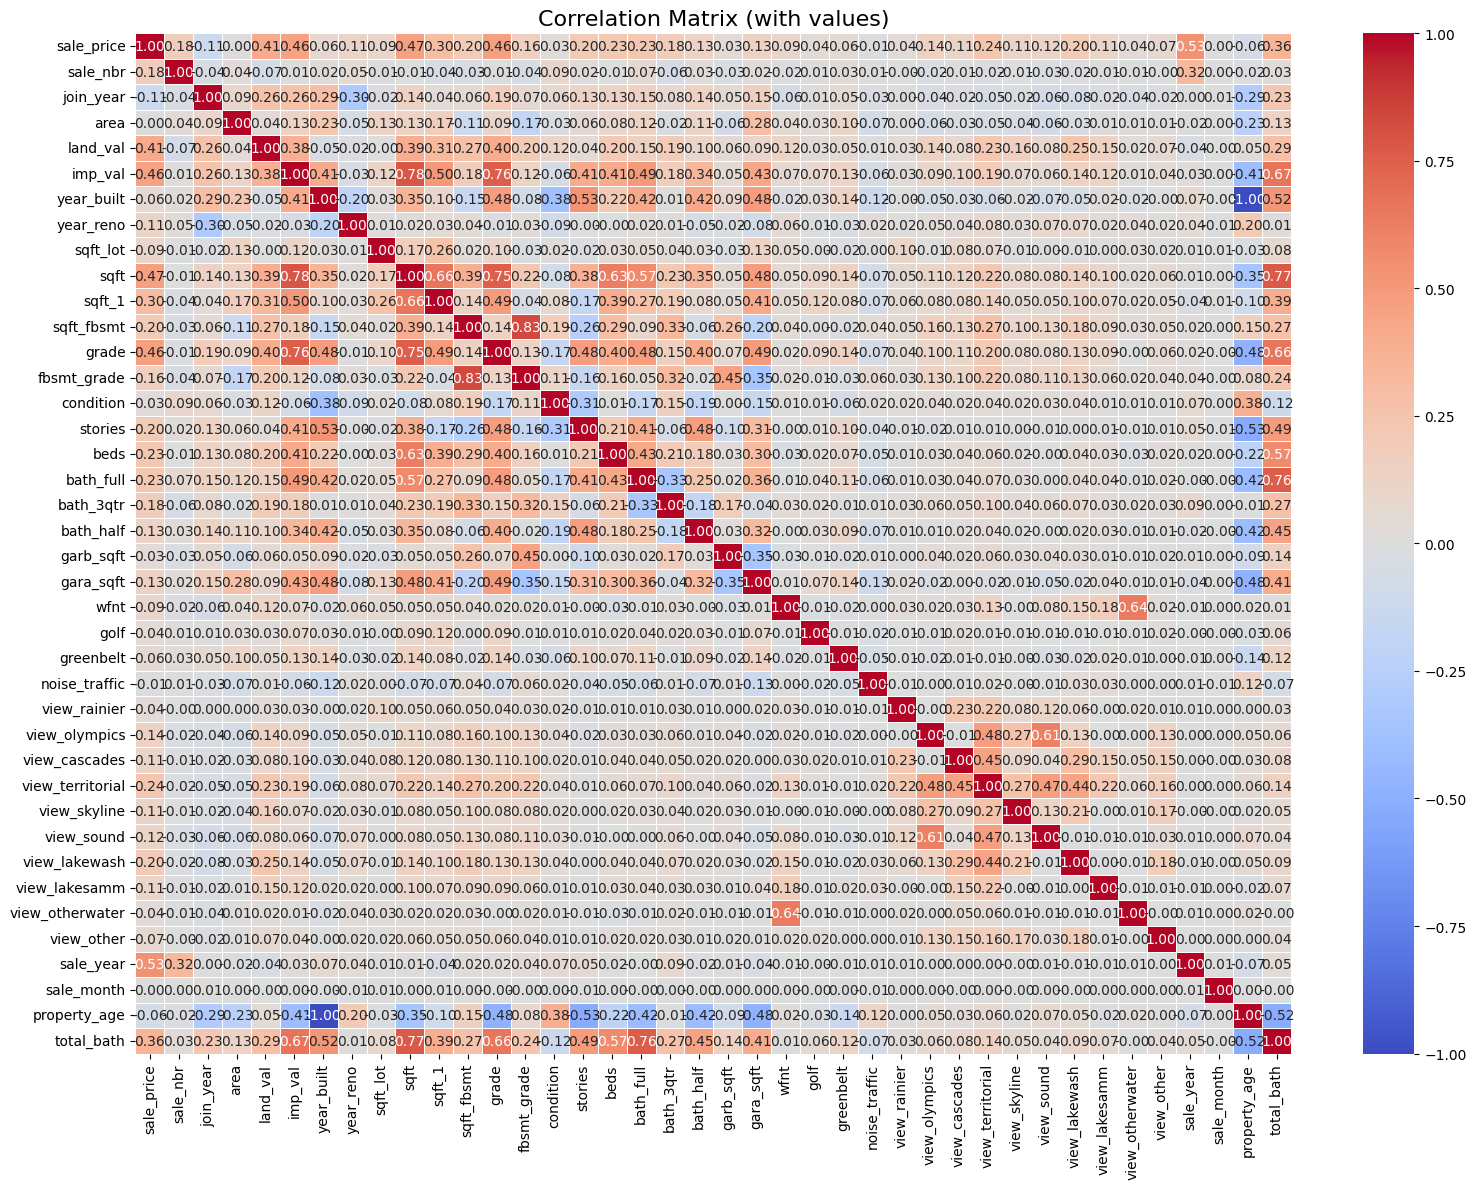

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns only
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Compute correlation
corr_matrix = data[numeric_cols].corr()

# Plot
plt.figure(figsize=(16, 12))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,          # ✅ show numbers
    fmt=".2f",           # format to 2 decimals
    linewidths=0.5
)

plt.title("Correlation Matrix (with values)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


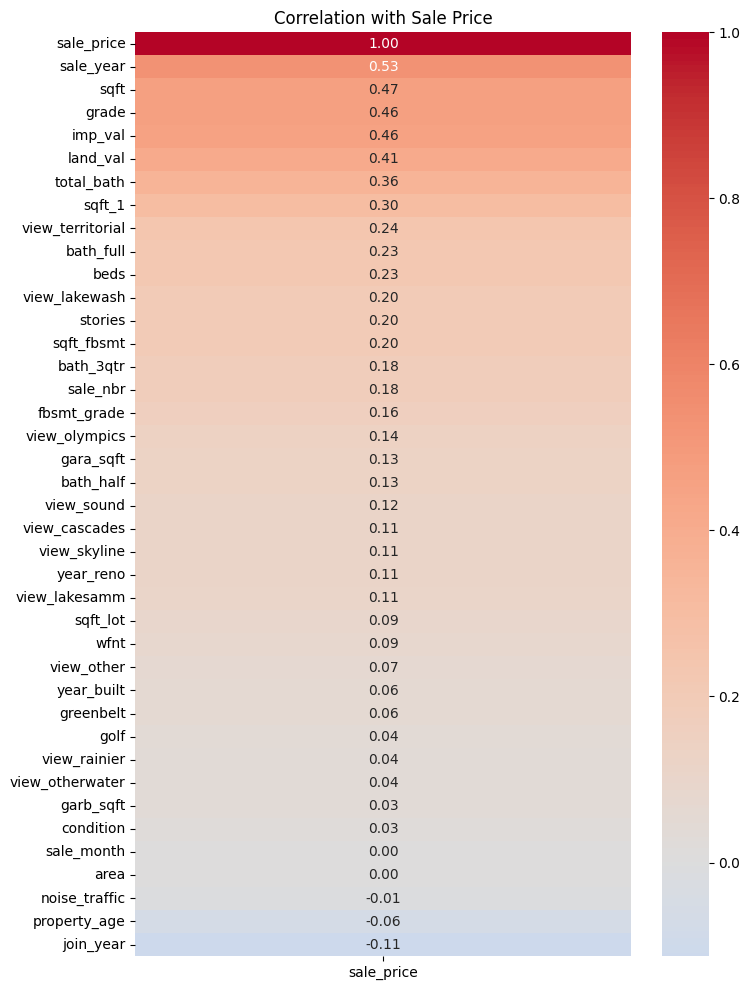

In [203]:
corr_with_target = corr_matrix["sale_price"].sort_values(ascending=False)

plt.figure(figsize=(8, 12))

sns.heatmap(
    corr_with_target.to_frame(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Correlation with Sale Price")
plt.show()


In [204]:
data.head(1)

,sale_date,sale_price,sale_nbr,join_status,join_year,area,city,zoning,subdivision,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,grade,fbsmt_grade,condition,stories,beds,bath_full,bath_3qtr,bath_half,garb_sqft,gara_sqft,wfnt,golf,greenbelt,noise_traffic,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket,sale_year,sale_month,property_age,total_bath
0,2014-11-15,236000,2.0,nochg,2025,53,FEDERAL WAY,RS7.2,alderwood south div no. 02,167000,372000,1975,0,10919,1560,1560,0,7,0,5,1.0,3,1,1,0,0,500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,i,2014,11,50,1.75


In [205]:
import numpy as np
import pandas as pd

# ----------------------------
# 1️⃣ Convert sale_date and extract time
# ----------------------------
data["sale_date"] = pd.to_datetime(data["sale_date"])

data["sale_year"]  = data["sale_date"].dt.year
data["sale_month"] = data["sale_date"].dt.month



# ----------------------------
# 2️⃣ Target type
# ----------------------------
data["sale_price"] = data["sale_price"].astype(float)




# ----------------------------
# 3️⃣ Categorical columns
# ----------------------------
cat_cols = [
    "join_status",
    "area",
    "city",
    "zoning",
    "subdivision",
    "condition",
    "submarket"
]

for col in cat_cols:
    data[col] = data[col].astype(str)

# Treat month as categorical
data["sale_month"] = data["sale_month"].astype(int)


# ----------------------------
# 4️⃣ Ordinal numeric
# ----------------------------
data["grade"] = data["grade"].astype(int)
data["fbsmt_grade"] = data["fbsmt_grade"].astype(int)


# ----------------------------
# 5️⃣ Continuous numeric
# ----------------------------
numeric_cols = [
    "sale_nbr", "join_year", "land_val", "imp_val",
    "year_built", "year_reno", "sqft_lot", "sqft",
    "sqft_1", "sqft_fbsmt", "stories", "beds",
    "garb_sqft", "gara_sqft", "property_age",
    "total_bath", "sale_year"
]

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")


# ----------------------------
# 6️⃣ Binary columns
# ----------------------------
binary_cols = [
    "wfnt", "golf", "greenbelt", "noise_traffic",
    "view_rainier", "view_olympics", "view_cascades",
    "view_territorial", "view_skyline", "view_sound",
    "view_lakewash", "view_lakesamm",
    "view_otherwater", "view_other"
]

for col in binary_cols:
    data[col] = data[col].astype(int)


# ----------------------------
# 7️⃣ Final check
# ----------------------------
print(data.dtypes)

sale_date           datetime64[ns]
sale_price                 float64
sale_nbr                   float64
join_status                 object
join_year                    int64
area                        object
city                        object
zoning                      object
subdivision                 object
land_val                     int64
imp_val                      int64
year_built                   int64
year_reno                    int64
sqft_lot                     int64
sqft                         int64
sqft_1                       int64
sqft_fbsmt                   int64
grade                        int64
fbsmt_grade                  int64
condition                   object
stories                    float64
beds                         int64
bath_full                    int64
bath_3qtr                    int64
bath_half                    int64
garb_sqft                    int64
gara_sqft                    int64
wfnt                         int64
golf                

In [206]:
data['city'].dtypes

dtype('O')

# splitting data

In [207]:
# # Sort chronologically
# data = data.sort_values("sale_date").reset_index(drop=True)


In [208]:
# data = data.drop(columns=["sale_date"])

In [209]:
split_index = int(len(data) * 0.8)

train = data.iloc[:split_index].copy()
val   = data.iloc[split_index:].copy()


In [210]:
TARGET = "sale_price"

X_train = train.drop(columns=[TARGET, "sale_date"])
y_train = train[TARGET]

X_val = val.drop(columns=[TARGET, "sale_date"])
y_val = val[TARGET]


In [211]:



for col in cat_cols:
    X_train[col] = X_train[col].fillna("unknown").astype(str)
    X_val[col]   = X_val[col].fillna("unknown").astype(str)


cat_features_index = [X_train.columns.get_loc(col) for col in cat_cols]



# general model


In [212]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    loss_function="Quantile:alpha=0.5",  # median first
    iterations=1000,
    depth=6,
    learning_rate=0.05,
    random_seed=42,
    verbose=200
)

model.fit(
    X_train,
    y_train,
    cat_features=cat_features_index,
    eval_set=(X_val, y_val)
)


0:	learn: 134974.4926451	test: 134742.9825455	best: 134742.9825455 (0)	total: 197ms	remaining: 3m 16s
200:	learn: 37552.6576072	test: 37354.8760984	best: 37354.8760984 (200)	total: 35.2s	remaining: 2m 19s
400:	learn: 33585.0975130	test: 33663.1699197	best: 33663.1699197 (400)	total: 1m 8s	remaining: 1m 42s
600:	learn: 31775.8419398	test: 32049.0453750	best: 32049.0453750 (600)	total: 1m 42s	remaining: 1m 7s
800:	learn: 30720.4337622	test: 31145.6308575	best: 31145.6308575 (800)	total: 2m 15s	remaining: 33.7s
999:	learn: 30048.9651653	test: 30632.0199934	best: 30632.0199934 (999)	total: 2m 47s	remaining: 0us

bestTest = 30632.01999
bestIteration = 999



## evaluation


In [213]:
pred_log = model.predict(X_val)
pred_log

array([190574.43520331, 228935.10271819, 200699.87445169, ...,
       684193.34093931, 831408.74117386, 751353.06087384], shape=(40000,))

In [214]:
import numpy as np

pred = pred_log
y_real = y_val


In [215]:
mae = np.mean(np.abs(y_real - pred))
print("MAE:", mae)


MAE: 61264.039987755445


In [216]:
rmse = np.sqrt(np.mean((y_real - pred) ** 2))
print("RMSE:", rmse)


RMSE: 112000.72628225441


In [217]:
from sklearn.metrics import r2_score

r2 = r2_score(y_real, pred)
print("R2:", r2)


R2: 0.9271335807056036


# models (q10 , q90)

In [218]:
model_q10 = CatBoostRegressor(
    loss_function="Quantile:alpha=0.1",
    iterations=1000,
    depth=8,
    learning_rate=0.05,
    random_seed=42,
    verbose=200
)

model_q10.fit(
    X_train,
    y_train,
    cat_features=cat_features_index,
    eval_set=(X_val, y_val)
)


0:	learn: 39389.1277683	test: 39405.6809795	best: 39405.6809795 (0)	total: 253ms	remaining: 4m 12s
200:	learn: 15108.9650998	test: 15353.9423307	best: 15353.9423307 (200)	total: 46.2s	remaining: 3m 3s
400:	learn: 13481.6352453	test: 14102.1342572	best: 14102.1342572 (400)	total: 1m 31s	remaining: 2m 16s
600:	learn: 12774.4604776	test: 13714.2350144	best: 13714.2350144 (600)	total: 2m 17s	remaining: 1m 31s
800:	learn: 12352.1878219	test: 13558.8437813	best: 13558.8437813 (800)	total: 3m 2s	remaining: 45.4s
999:	learn: 12066.0319286	test: 13467.5734108	best: 13467.5734108 (999)	total: 3m 51s	remaining: 0us

bestTest = 13467.57341
bestIteration = 999



In [219]:
model_q90 = CatBoostRegressor(
    loss_function="Quantile:alpha=0.9",
    iterations=1000,
    depth=8,
    learning_rate=0.05,
    random_seed=42,
    verbose=200
)

model_q90.fit(
    X_train,
    y_train,
    cat_features=cat_features_index,
    eval_set=(X_val, y_val)
)


0:	learn: 94397.1145945	test: 93460.6299161	best: 93460.6299161 (0)	total: 228ms	remaining: 3m 48s
200:	learn: 16712.6040285	test: 17116.2678541	best: 17116.2678541 (200)	total: 49.1s	remaining: 3m 15s
400:	learn: 14897.2290464	test: 15768.3636461	best: 15768.3636461 (400)	total: 1m 35s	remaining: 2m 22s
600:	learn: 14044.9045270	test: 15327.9526433	best: 15327.9526433 (600)	total: 2m 20s	remaining: 1m 32s
800:	learn: 13452.7176756	test: 15102.2005496	best: 15102.0332446 (798)	total: 3m 1s	remaining: 45.2s
999:	learn: 13033.2699159	test: 14974.7091373	best: 14974.7091373 (999)	total: 3m 46s	remaining: 0us

bestTest = 14974.70914
bestIteration = 999



In [220]:
pred_q10  = model_q10.predict(X_val)
val_pred_median = model.predict(X_val)
pred_q90  = model_q90.predict(X_val)


In [ ]:
print("test")

In [221]:
validation_export = val.copy()

validation_export["pred_lower"] = pred_q10
validation_export["pred_median"] = val_pred_median
validation_export["pred_upper"] = pred_q90


In [222]:
validation_export["interval_width"] = (
    validation_export["pred_upper"] -
    validation_export["pred_lower"]
)

validation_export["abs_error"] = abs(
    validation_export[TARGET] -
    validation_export["pred_median"]
)

validation_export["covered"] = (
    (validation_export[TARGET] >= validation_export["pred_lower"]) &
    (validation_export[TARGET] <= validation_export["pred_upper"])
).astype(int)



In [223]:
coverage = np.mean(
    (y_real >= pred_q10) &
    (y_real <= pred_q90)
)

print("Coverage:", coverage)


Coverage: 0.772125


In [224]:
print("Inverted intervals:",
      np.mean(pred_q10 > pred_q90))


Inverted intervals: 0.000125


In [225]:
avg_width = np.mean(pred_q90 - pred_q10)
print("Average Width:", avg_width)


Average Width: 179732.57690476128


In [226]:
lower = np.minimum(pred_q10, pred_q90)
upper = np.maximum(pred_q10, pred_q90)



In [227]:
def pinball_loss(y_true, y_pred, alpha):
    diff = y_true - y_pred
    return np.mean(np.maximum(alpha * diff, (alpha - 1) * diff))


In [228]:
validation_export["pinball_10"] = pinball_loss(
    validation_export[TARGET],
    validation_export["pred_lower"],
    0.10
)

validation_export["pinball_50"] = pinball_loss(
    validation_export[TARGET],
    validation_export["pred_median"],
    0.50
)

validation_export["pinball_90"] = pinball_loss(
    validation_export[TARGET],
    validation_export["pred_upper"],
    0.90
)


In [229]:
validation_export.to_csv("validation_predictions.csv", index=False)

In [230]:
pinball_q10 = pinball_loss(y_real, pred_q10, 0.10)
pinball_q90 = pinball_loss(y_real, pred_q90, 0.90)

print("Pinball Loss (q10):", pinball_q10)
print("Pinball Loss (q90):", pinball_q90)


Pinball Loss (q10): 13467.573410957808
Pinball Loss (q90): 14974.70913751681


In [231]:
mid_pred = (pred_q10 + pred_q90) / 2

mae_mid = np.mean(np.abs(y_real - mid_pred))

print("Combined MAE (midpoint):", mae_mid)


Combined MAE (midpoint): 61513.38223283811


# Fill Test Set


In [232]:


test = pd.read_csv('test.csv', sep=';')


In [233]:
# Apply same preprocessing to test as training
test = test.copy()
test_ids = test["id"].copy() 

# Date-derived features
test["sale_date"] = pd.to_datetime(test["sale_date"], errors="coerce", dayfirst=True)
test["sale_year"] = test["sale_date"].dt.year
test["sale_month"] = test["sale_date"].dt.month

# Engineered features
test["property_age"] = 2025 - test["year_built"]
test["total_bath"] = test["bath_full"] + 0.75 * test["bath_3qtr"] + 0.5 * test["bath_half"]

# Same dropped columns as training (safe if some are absent)
test = test.drop(columns=["id", "sale_warning","sale_date", "latitude", "longitude", "present_use"], errors="ignore")

# Same dtype treatment as training
for col in cat_cols:
    if col in test.columns:
        test[col] = test[col].fillna("unknown").astype(str)
test["sale_month"] = test["sale_month"].fillna(0).astype(int).astype(str)

# # Build test matrix with exact trained feature order
# X_test = test.reindex(columns=final_features)

# Final categorical safety
for col in cat_cols:
    if col in test.columns:
        test[col] = test[col].fillna("unknown").astype(str)


In [234]:


test_pred_lower  = model_q10.predict(test)
test_pred_median = model.predict(test)
test_pred_upper  = model_q90.predict(test)

test_export = test.copy()

test_export["id"] = test_ids
test_export["pred_lower"] = test_pred_lower
test_export["pred_median"] = test_pred_median
test_export["pred_upper"] = test_pred_upper

test_export["interval_width"] = (
    test_export["pred_upper"] -
    test_export["pred_lower"]
)

test_export["property_age"] = 2026 - test_export["year_built"]

test_export.to_csv("test_predictions.csv", index=False)



In [235]:
validation_export.dtypes

sale_date           datetime64[ns]
sale_price                 float64
sale_nbr                   float64
join_status                 object
join_year                    int64
area                        object
city                        object
zoning                      object
subdivision                 object
land_val                     int64
imp_val                      int64
year_built                   int64
year_reno                    int64
sqft_lot                     int64
sqft                         int64
sqft_1                       int64
sqft_fbsmt                   int64
grade                        int64
fbsmt_grade                  int64
condition                   object
stories                    float64
beds                         int64
bath_full                    int64
bath_3qtr                    int64
bath_half                    int64
garb_sqft                    int64
gara_sqft                    int64
wfnt                         int64
golf                

In [236]:
# submission = pd.DataFrame({
#     "id": test_ids,
#     "pi_lower": pi_lower,
#     "mi_upper": (pi_upper + pi_lower) / 2,
#     "pi_upper": pi_upper,
#     "marge": pi_upper - pi_lower,
#     "marge_to_mi": ((pi_upper + pi_lower) / 2) - pi_lower,
# })

# submission.to_csv("submission.csv", index=False)


In [237]:
# mid_pred_test = (pi_lower + pi_upper) / 2
# import matplotlib.pyplot as plt
# import numpy as np

# n = 200  # show first 200 only
# x = np.arange(n)

# plt.figure(figsize=(14,6))

# plt.plot(x, mid_pred_test[:n], label="Predicted Price", color="blue")

# plt.fill_between(
#     x,
#     pi_lower[:n],
#     pi_upper[:n],
#     color="blue",
#     alpha=0.2,
#     label="Prediction Interval"
# )

# plt.title("Predicted Price with Uncertainty Range (Test Set)")
# plt.xlabel("Sample Index")
# plt.ylabel("Predicted Price")
# plt.legend()
# plt.show()


In [238]:
# Save full processed dataset
X_train.to_csv("processed_train.csv", index=False)
#test.to_csv("processed_test_full.csv", index=False)

In [239]:

# # Load CSV files
# df1 = pd.read_csv("test.csv", sep=';')
# df2 = pd.read_csv("submission.csv")

# # Merge on column "id"
# merged = pd.merge(df1, df2, on="id", how="inner")

# # Save result
# merged.to_csv("test_predicted.csv", index=False)

# print(merged.head())


In [240]:
# import pandas as pd

# # Get feature importance
# importance = model_q10_final.get_feature_importance()

# # Get feature names
# feature_names = X_train.columns

# # Create dataframe
# feat_imp = pd.DataFrame({
#     "feature": feature_names,
#     "importance": importance
# })

# # Sort descending
# feat_imp = feat_imp.sort_values(by="importance", ascending=False)
# feat_imp.head(10)


In [241]:
# import pandas as pd

# # Get feature importance
# importance = model_q90_final.get_feature_importance()

# # Get feature names
# feature_names = X_train.columns

# # Create dataframe
# feat_imp = pd.DataFrame({
#     "feature": feature_names,
#     "importance": importance
# })

# # Sort descending
# feat_imp = feat_imp.sort_values(by="importance", ascending=False)
# feat_imp.head(10)
